<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python Mini-Project
### Digital Vidya Copyright

### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are methods available to extract features that will be covered in upcoming sessions but it's very important to build the intuition. The process of data cleaning and visualization helps with that. In this assignment, we will try to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

Load the Lending Club data into a pandas dataframe. The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

We strongly recommend that you look in to the columns closely to see the relationship between them. This is not a guided assignment and you can use the techniques that you have learnt so far to clean and visualize the data. 

There is no one right answer but this tests your ability to handle a much larger unknown dataset.

Here are the broad guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [1]:
%cd C:\Users\Nischay\Downloads\Data Sets

C:\Users\Nischay\Downloads\Data Sets


In [2]:
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns',None)
df = pd.read_csv("loan.csv",low_memory=False)
df.shape

(42542, 145)

In [3]:
df.shape
# df = df.iloc[::-1] #inorder for the plots to be shown in ascending order

(42542, 145)

In [4]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12020.373444,11312.912629,9675.675936,2239.981444,1.516890,103.199267,14.420927,2613.245652,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.794250,49.889875,1.262500
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.837244,9038.609652,7105.750304,2585.057393,7.830064,736.777540,162.317803,4385.066535,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.543917,15.569143,4.142869
min,NaN,500.000000,500.00

# DATA CLEANING

In [5]:
#since ID,member_id and url have no impact on the intrest rate.
df.drop(['id','member_id','url'],axis=1,inplace=True)

In [6]:
#getting the total null values 
df_missing=df.isna().sum()
#getting the percentage of null values in columns
df_missing/len(df)

loan_amnt                                     0.000165
funded_amnt                                   0.000165
funded_amnt_inv                               0.000165
term                                          0.000165
int_rate                                      0.000165
installment                                   0.000165
grade                                         0.000165
sub_grade                                     0.000165
emp_title                                     0.061892
emp_length                                    0.026303
home_ownership                                0.000165
annual_inc                                    0.000259
verification_status                           0.000165
issue_d                                       0.000165
loan_status                                   0.000165
pymnt_plan                                    0.000165
desc                                          0.312632
purpose                                       0.000165
title     

In [7]:
#removing columns which have more than 50% null values
df.drop(['mths_since_last_delinq','mths_since_last_record','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','mths_since_recent_revol_delinq','num_accts_ever_120_pd','hardship_flag','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',],axis=1,inplace =True)

In [8]:
df.isnull()
df.dropna(how='all',inplace=True)

In [9]:
df.shape
df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2626
emp_length                   1112
home_ownership                  0
annual_inc                      4
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
desc                        13293
purpose                         0
title                          13
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                    29
earliest_cr_line               29
inq_last_6mths                 29
open_acc                       29
pub_rec                        29
revol_bal                       0
revol_util                     90
total_acc     

In [10]:
#removing columns which have more than 50% null values
df.drop(['open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','mths_since_recent_inq','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq'],axis=1,inplace=True)

In [11]:
#removing the percentage symbol from int_rate and coverting it back to float
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate']=df['int_rate'].astype(float)

In [12]:
#checking any rows have null value for intrest rate.
df[df['int_rate']==0]
#good to know there are no such columns.

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag


In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Dec-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,NaN,Apr-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Cash,N


In [14]:
#Getting only those columns for which are related to intreest rate.Since still many columns have nan or 0 values.
df.drop(['emp_title','pymnt_plan','desc','title','delinq_2yrs','pub_rec','revol_util','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_rec_late_fee','next_pymnt_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_act_il','open_il_12m','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','debt_settlement_flag'],axis=1,inplace=True)

In [15]:
#Since there still nan values
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1112
home_ownership                0
annual_inc                    4
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
earliest_cr_line             29
inq_last_6mths               29
open_acc                     29
revol_bal                     0
total_acc                    29
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                 83
last_pymnt_amnt               0
last_credit_pull_d            4
applicat

In [16]:
#dropping those rows which have nan values.
df=df.dropna()
df.shape

(41313, 33)

In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,disbursement_method
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1.0,3.0,13648.0,9.0,5833.84,5000.00,863.16,0.0,0.00,Jan-15,171.62,Dec-18,Individual,Cash
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,Apr-99,5.0,3.0,1687.0,4.0,1014.53,456.46,435.17,122.9,1.11,Apr-13,119.66,Oct-16,Individual,Cash
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2.0,2.0,2956.0,10.0,3005.67,2400.00,605.67,0.0,0.00,Jun-14,649.91,Jun-17,Individual,Cash
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,Feb-96,1.0,10.0,5598.0,37.0,12231.89,10000.00,2214.92,0.0,0.00,Jan-15,357.48,Apr-16,Individual,Cash
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,other,972xx,OR,17.94,Jan-96,0.0,15.0,27783.0,38.0,4066.91,3000.00,1066.91,0.0,0.00,Jan-17,67.30,Apr-18,Individual,Cash


In [18]:
#for the correlation matrix sperate the float columns from dataframe. 
df1=df.select_dtypes(include='float')
df1.shape

(41313, 17)

In [19]:
#Correlation between the continous valued columns
df1.corr(method='pearson')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
loan_amnt,1.000000,0.981522,0.928476,0.290746,0.930228,0.273538,0.063913,-0.030715,0.173036,0.253085,0.256407,0.844276,0.851795,0.728800,0.133307,0.073006,0.446939
funded_amnt,0.981522,1.000000,0.946629,0.293549,0.956185,0.269364,0.063712,-0.030431,0.171240,0.249356,0.250487,0.860491,0.870112,0.736159,0.134313,0.075083,0.451680
funded_amnt_inv,0.928476,0.946629,1.000000,0.278573,0.888659,0.249861,0.070029,-0.075953,0.152845,0.210765,0.240308,0.914094,0.841844,0.725743,0.116114,0.056108,0.440694
int_rate,0.290746,0.293549,0.278573,1.000000,0.269311,0.051966,0.120965,0.177756,0.026888,0.082423,-0.029760,0.280287,0.173420,0.513517,0.122626,0.072439,0.145512
installment,0.930228,0.956185,0.888659,0.269311,1.000000,0.275215,0.053638,-0.011191,0.171918,0.264104,0.233275,0.799475,0.844616,0.632482,0.117740,0.076178,0.398990
annual_inc,0.273538,0.269364,0.249861,0.051966,0.275215,1.000000,-0.118398,0.027635,0.165807,0.282767,0.245201,0.240716,0.256712,0.185568,0.025523,0.017543,0.137399
dti,0.063913,0.063712,0.070029,0.120965,0.053638,-0.118398,1.000000,0.012491,0.299131,0.189799,0.241904,0.068058,0.040336,0.104088,0.021894,0.007721,0.004011
inq_last_6mths,-0.030715,-0.030431,-0.075953,0.177756,-0.011191,0.027635,0.012491,1.000000,0.095032,0.008038,0.092291,-0.085207,-0.069740,-0.012518,0.035395,0.035452,-0.007225
open_acc,0.173036,0.171240,0.152845,0.026888,0.171918,0.165807,0.299131,0.095032,1.000000,0.256442,0.692109,0.141856,0.153091,0.122408,0.016242,0.005387,0.071853
revol_bal,0.253085,0.249356,0.210765,0.082423,0.264104,0.282767,0.189799,0.008038,0.256442,1.000000,0.274875,0.193385,0.212388,0.179229,0.029457,0.014384,0.083634


# DATA VISUALIZATION

Visulaization of the features/Columns

<Figure size 720x720 with 0 Axes>

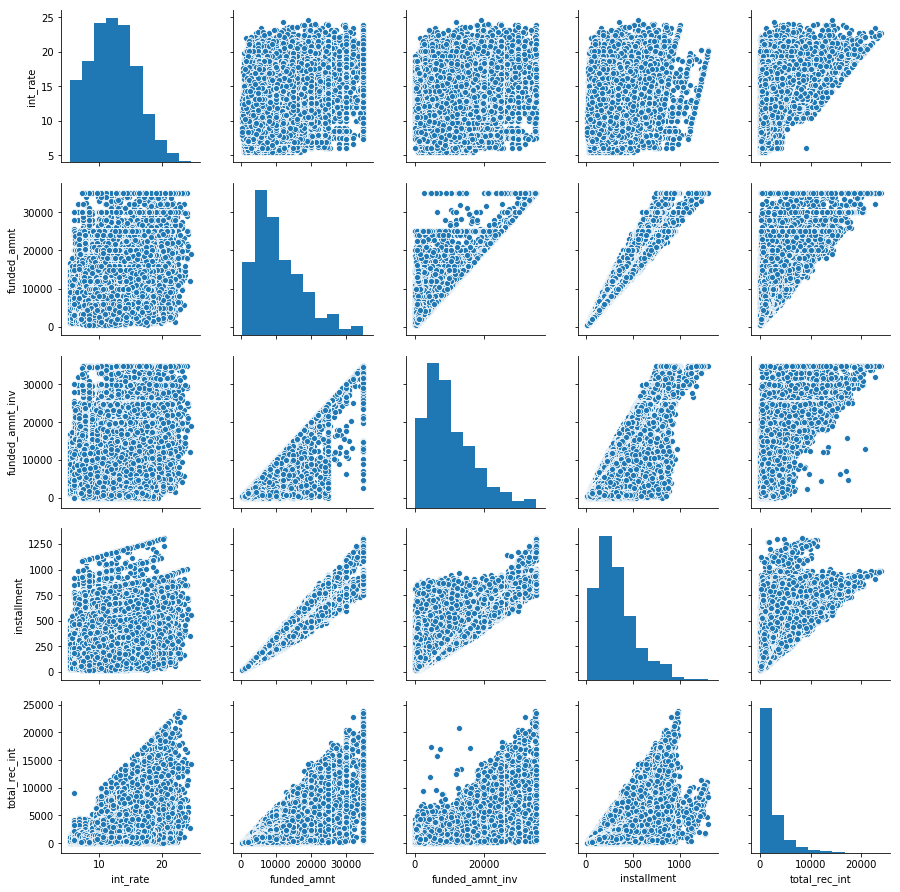

In [20]:
#pair plot corelation for continous valued columns
df2=df[['int_rate','funded_amnt','funded_amnt_inv','installment','total_rec_int']]
plt.figure(figsize=(10,10))
sns.pairplot(df2)

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


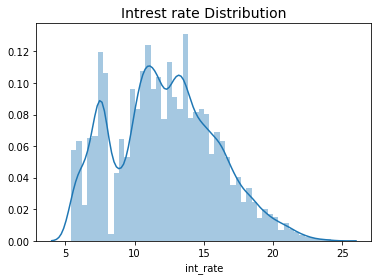

In [21]:
#Intrest rate
plt.title("Intrest rate Distribution", fontsize = 14)
sns.distplot(df['int_rate'])

The intrest rate distribution is right skewed.

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


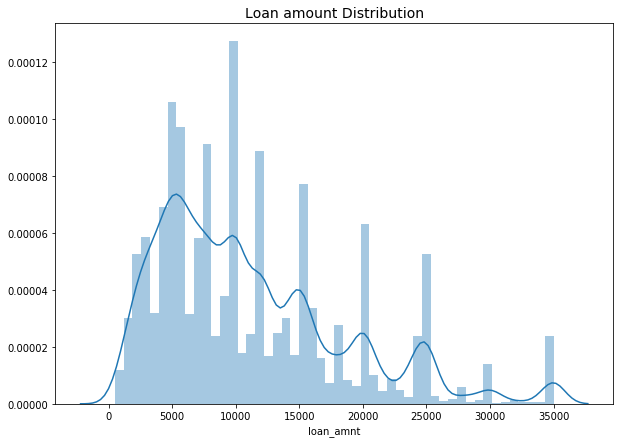

In [22]:
plt.figure(figsize= (10,7))
plt.title("Loan amount Distribution", fontsize = 14)
sns.distplot(df['loan_amnt'])

The loan amount distribution is right skewed. 

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


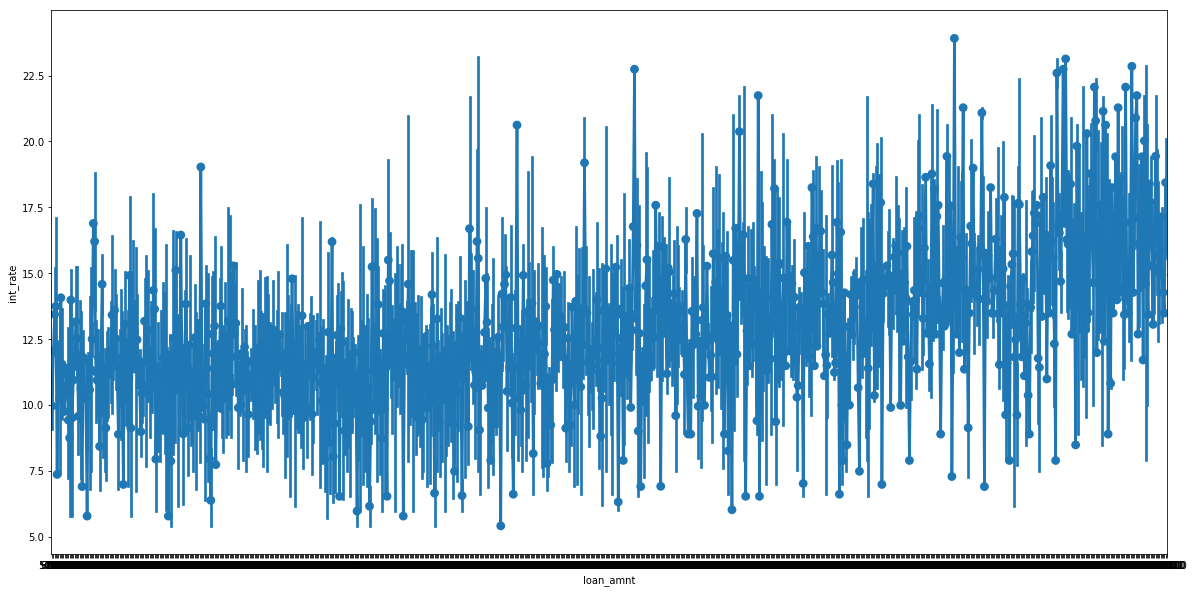

In [23]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df['loan_amnt'], y=df['int_rate'],  data=df)

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


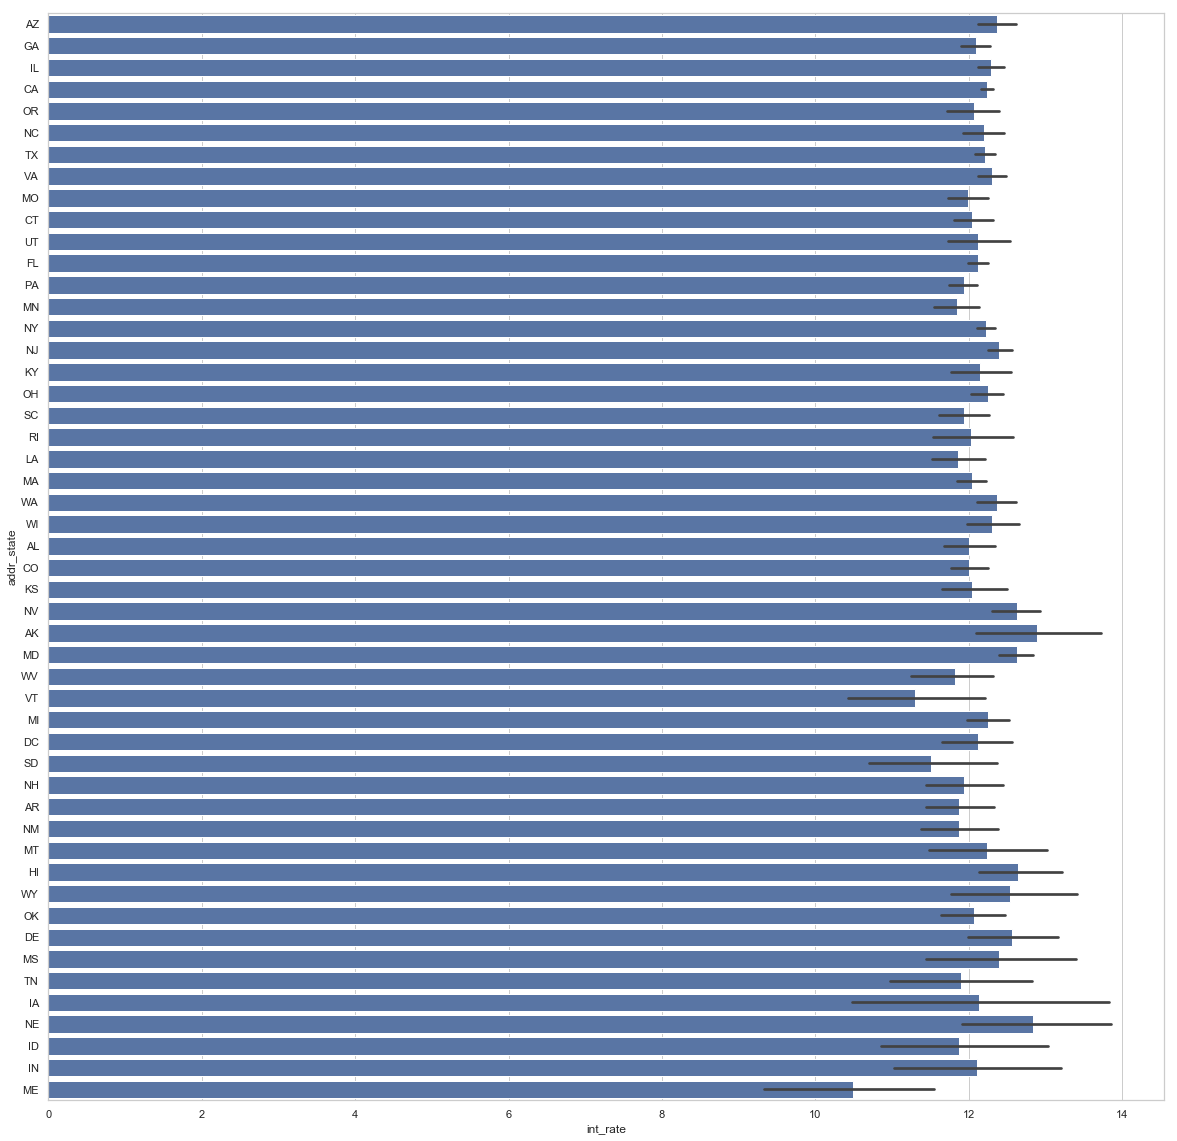

In [24]:
# Plotting the interest of all the states per population

# Initialize the matplotlib figure
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Plot the interes rate
sns.barplot(x="int_rate", y="addr_state", data=df,
            label="Interest rate", color="b")

B    12020
A     9772
C     8528
D     5877
E     3332
F     1276
G      508
Name: grade, dtype: int64


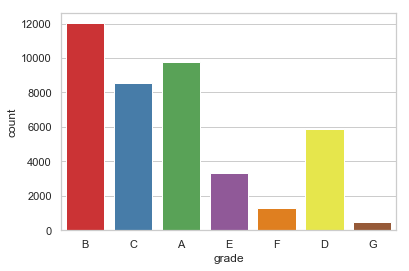

In [25]:
#grade
sns.countplot(x='grade',data=df,palette='Set1')
print(df['grade'].value_counts())

Fully Paid                                             33267
Charged Off                                             5373
Does not meet the credit policy. Status:Fully Paid      1942
Does not meet the credit policy. Status:Charged Off      731
Name: loan_status, dtype: int64


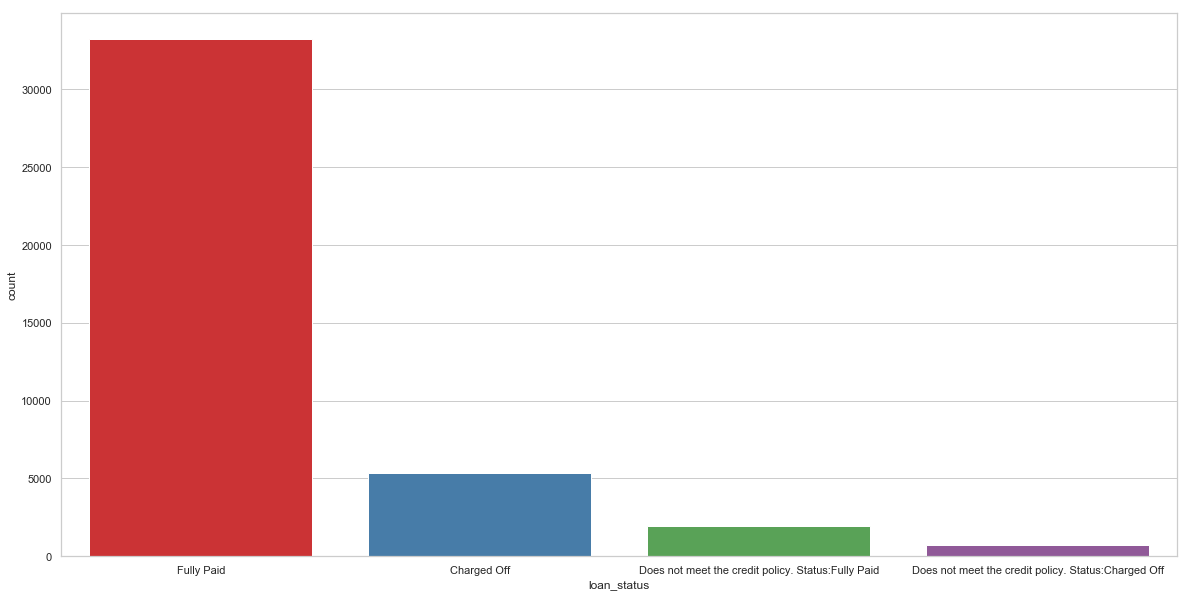

In [26]:
#loan_status
plt.figure(figsize=(20,10))
sns.countplot(x='loan_status',data=df, palette='Set1')
print(df['loan_status'].value_counts())

The bank has paid full loan amout for almost 80% of its customers

RENT        19677
MORTGAGE    18470
OWN          3026
OTHER         136
NONE            4
Name: home_ownership, dtype: int64


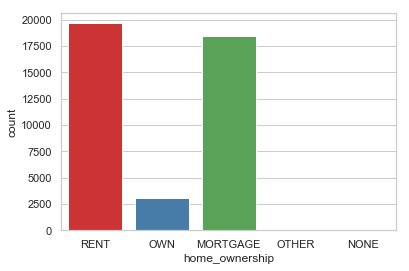

In [27]:
#home_ownership
sns.countplot(x='home_ownership',data=df, palette='Set1')
print(df['home_ownership'].value_counts())

debt_consolidation    19330
credit_card            5342
other                  4215
home_improvement       3094
major_purchase         2233
small_business         1938
car                    1563
wedding                 985
medical                 725
moving                  602
educational             411
house                   410
vacation                368
renewable_energy         97
Name: purpose, dtype: int64


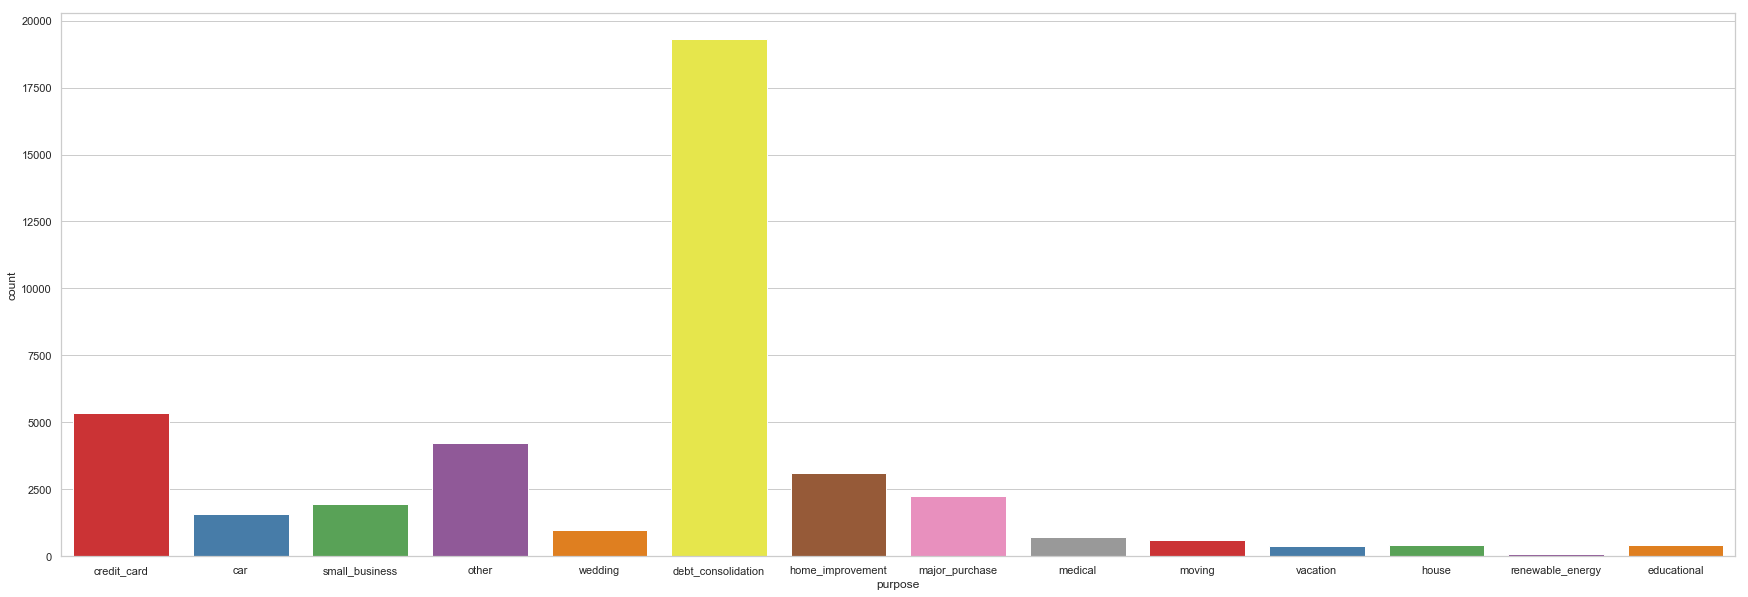

In [28]:
#Loan Purpose
plt.figure(figsize=(30,10))
sns.countplot(x='purpose',data=df,palette='Set1')
print(df['purpose'].value_counts())

47% of the loan takers have taken for Debt consolidation.

Not Verified       18240
Verified           12982
Source Verified    10091
Name: verification_status, dtype: int64


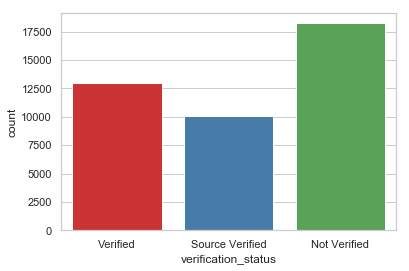

In [29]:
#Verificiation Status
sns.countplot(x='verification_status',data=df,palette='Set1')
print(df['verification_status'].value_counts())

 36 months    30605
 60 months    10708
Name: term, dtype: int64


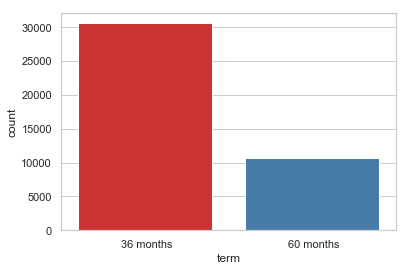

In [30]:
#term
sns.countplot(x='term',data=df, palette='Set1')
print(df['term'].value_counts())

As u can see 74% of the loan takers have taken short term of 36 months repayment period.

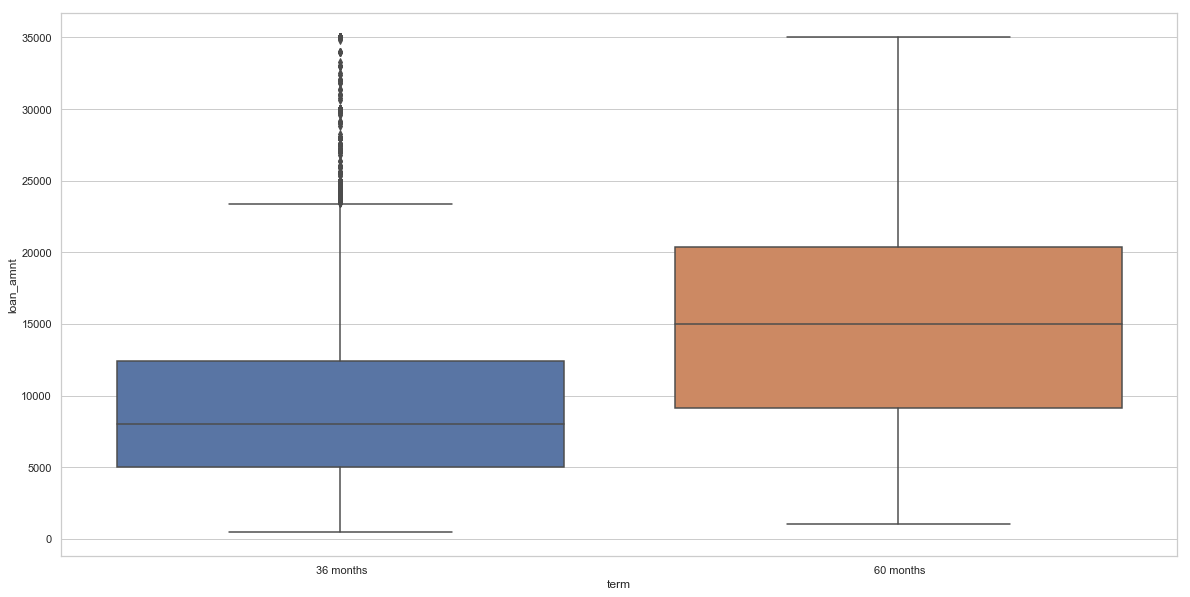

In [31]:
#boxplot terms vs loan amount
plt.figure(figsize=(20,10))
sns.boxplot(x=df['term'], y=df['loan_amnt'])

The loan takers for 36 months have taken more deiversied amount.
The mean loan amount for 60 months repayment period is 15000.

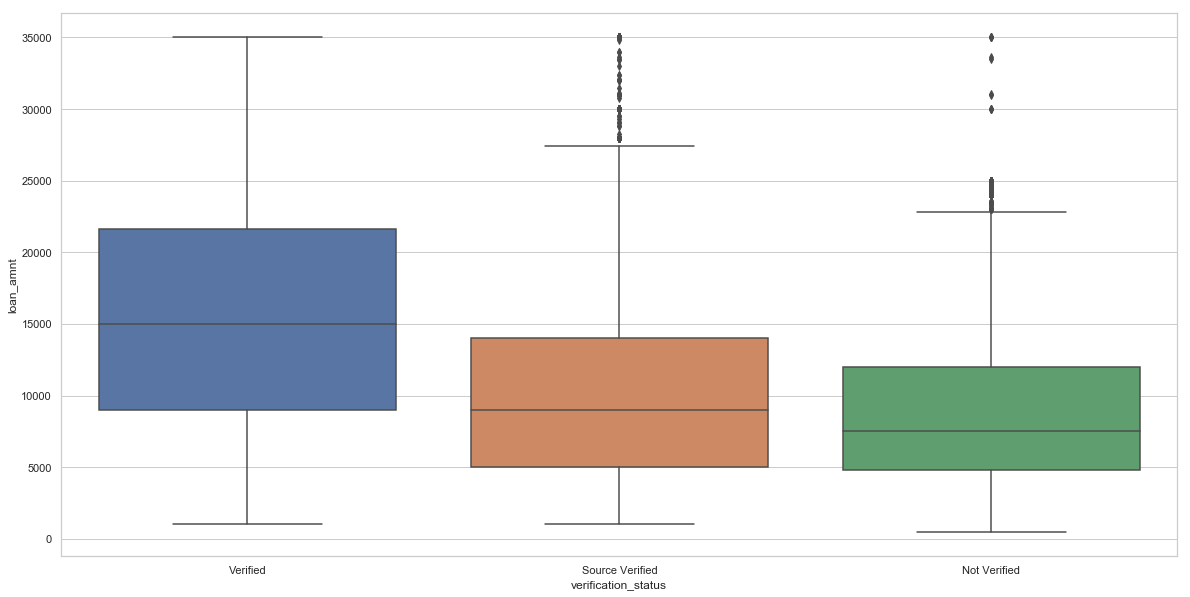

In [32]:
#boxplot verification status vs loan amount
plt.figure(figsize=(20,10))
sns.boxplot(x=df['verification_status'], y=df['loan_amnt'])

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


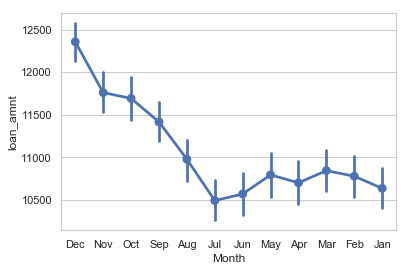

In [39]:
#Loans giving in months and years.
df['Month'] = df.issue_d.str.extract('([A-Za-z ]+)', expand = True)
df['Year'] = df.issue_d.str.extract('(\d+)', expand = True)
sns.pointplot(x=df['Month'], y=df['loan_amnt'],  data=df)

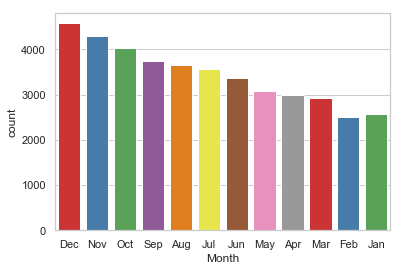

In [40]:
sns.countplot(x=df['Month'],  data=df,palette='Set1')

More loans have be taken in December than any other month.

C:\Users\Nischay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


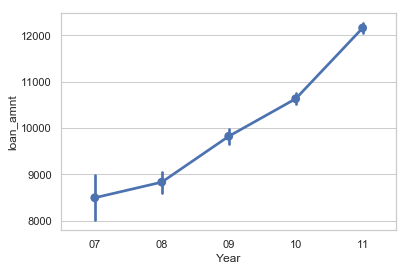

In [41]:
sns.pointplot(x=df['Year'], y=df['loan_amnt'],  data=df)

The loan takers has increased from year to year.

In [42]:
#independant varibales
x=df.drop('int_rate', axis=1)
#Dependant variable
y=df['int_rate']